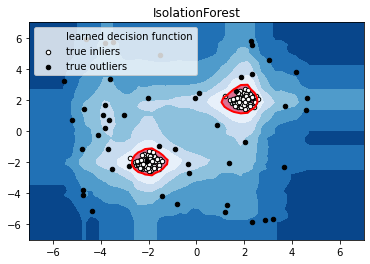

In [3]:
# 参考https://blog.csdn.net/ye1215172385/article/details/79762317 
# 官方例子https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# 构造训练样本
n_samples = 200  #样本总数
outliers_fraction = 0.25  #异常样本比例
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

X = 0.3 * rng.randn(n_inliers // 2, 2)
X_train = np.r_[X + 2, X - 2]   #正常样本
X_train = np.r_[X_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]  #正常样本加上异常样本

# 构造模型并拟合
clf = IsolationForest(max_samples=n_samples, random_state=rng, contamination=outliers_fraction)
clf.fit(X_train)
# 计算得分并设置阈值
scores_pred = clf.decision_function(X_train)
threshold = np.percentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)  #绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  #绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  #绘制正常点区域，值从阈值到最大的那部分

b = plt.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',
                    s=20, edgecolor='k')
c = plt.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',
                    s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper left")
plt.show()

In [6]:
import numpy as np
# 构造训练样本
n_samples = 200  #样本总数
outliers_fraction = 0.25  #异常样本比例
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

X = 0.3 * rng.randn(n_inliers // 2, 2)
X_train = np.r_[X + 2, X - 2]   #正常样本
X_train = np.r_[X_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]  #正常样本加上异常样本

In [8]:
from sklearn.ensemble import IsolationForest
# fit the model
# max_samples 构造一棵树使用的样本数，输入大于1的整数则使用该数字作为构造的最大样本数目，
# 如果数字属于(0,1]则使用该比例的数字作为构造iforest
# outliers_fraction 多少比例的样本可以作为异常值
clf = IsolationForest(max_samples=0.8, contamination=0.25)
clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(X_train)
threshold = np.percentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图

## 以下两种方法的筛选结果，完全相同
X_train_predict1 = X_train[clf.predict(X_train)==1]
X_train_predict2 = X_train[scores_pred>=threshold,:]
# 其中，1的表示非异常点，-1的表示为异常点
clf.predict(X_train)

'\n#array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,\n        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,\n       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,\n       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,\n       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])\n       '

In [10]:
from sklearn.datasets import load_iris 
from sklearn.ensemble import IsolationForest

# 导入iris数据集
data = load_iris(as_frame=True) 
X,y = data.data, data.target 
df = data.frame 

# 训练IF
iforest = IsolationForest(
    n_estimators=100, 
    max_samples='auto',  
    contamination=0.05, 
    max_features=4,  
    bootstrap=False, 
    n_jobs=-1, random_state=1)

# 异常判断，-1为异常，1为正常
df['label'] = iforest.fit_predict(X) 

# 异常评分
df['scores'] = iforest.decision_function(X)
df.head(100)

C:\Users\23665\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,scores
0,5.1,3.5,1.4,0.2,0,1,0.177972
1,4.9,3.0,1.4,0.2,0,1,0.148945
2,4.7,3.2,1.3,0.2,0,1,0.129540
3,4.6,3.1,1.5,0.2,0,1,0.119440
4,5.0,3.6,1.4,0.2,0,1,0.169537
...,...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,1,0.136797
96,5.7,2.9,4.2,1.3,1,1,0.175884
97,6.2,2.9,4.3,1.3,1,1,0.165803
98,5.1,2.5,3.0,1.1,1,1,0.039331
